In [80]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import seaborn as sns

#Reading and modifying the dataset and data preprocessing

In [134]:
df = pd.read_excel('/content/Data_Cortex_Nuclear.xls')

In [135]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [136]:
dataset = df.iloc[:, 1:-4]

In [137]:
dataset.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [138]:
dataset.isnull().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Length: 77, dtype: int64

In [139]:
dataset = dataset.dropna()

#Data Visualization

In [140]:
!pip install plotly

In [141]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [143]:
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(dataset)

In [144]:
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(dataset)

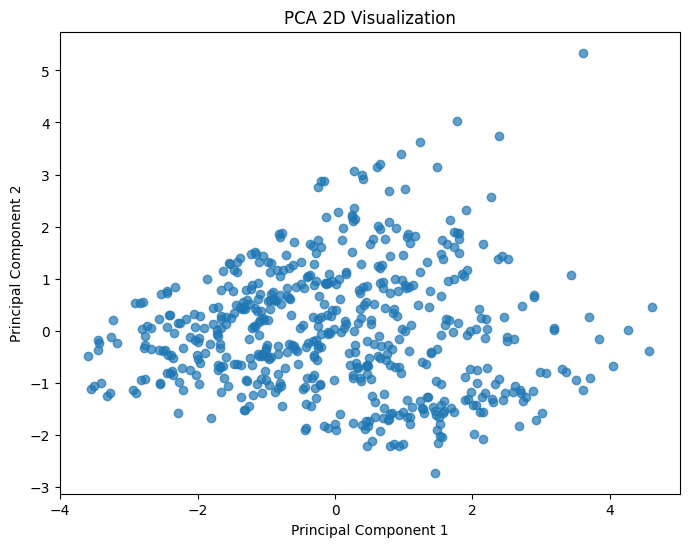

In [145]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Visualization')
plt.show()

In [146]:
fig = px.scatter_3d(
    x=data_pca_3d[:, 0],
    y=data_pca_3d[:, 1],
    z=data_pca_3d[:, 2],
    title='PCA 3D Visualization',
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'}
)
fig.show()

#Clustering

In [159]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import AgglomerativeClustering


###K-MEANS

In [177]:
import numpy as np
scores = []

for k in range(1, 26):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset)
    scores.append(kmeans.inertia_)

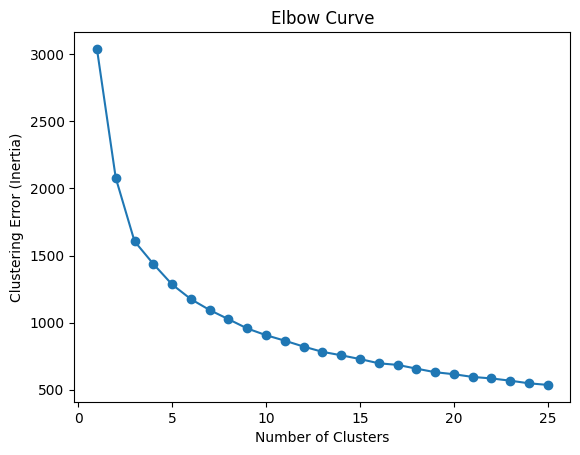

In [178]:
plt.plot(range(1,26), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Error (Inertia)')
plt.title('Elbow Curve')
plt.show()

this is why i chose to use 5 clusters



In [166]:
kmeans = KMeans(n_clusters=5, n_init='auto').fit(dataset)

In [167]:
tsne = TSNE(n_components=3)
tsne_data = tsne.fit_transform(dataset)

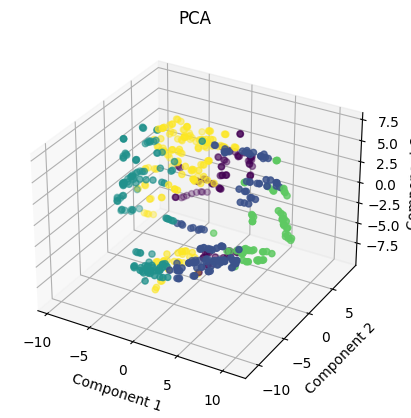

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=kmeans.labels_)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('PCA')
plt.show()

###Agglomerative clustering

In [169]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [170]:
Z = linkage(dataset, method='ward')

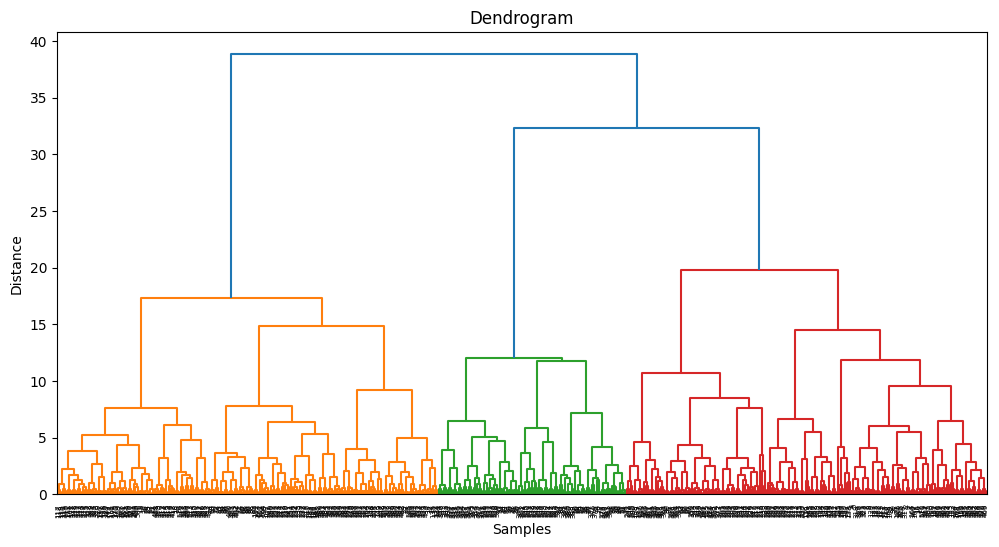

In [171]:
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [172]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(dataset)

AgglomerativeClustering(n_clusters=3)

In [173]:
tsne = TSNE(n_components=3)
tsne_data = tsne.fit_transform(dataset)

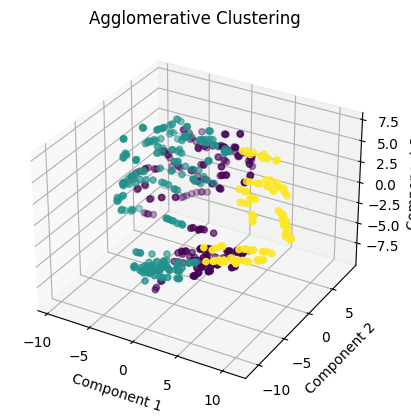

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=agglomerative.labels_)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('Agglomerative Clustering')
plt.show()

#Choosing the best clustering algorithm

In [179]:
from sklearn.metrics import calinski_harabasz_score

In [180]:
kmeans_labels = kmeans.labels_
agglomerative_labels = agglomerative.labels_

ch_kmeans = calinski_harabasz_score(X, kmeans_labels)
ch_agglomerative = calinski_harabasz_score(X, agglomerative_labels)

In [181]:
print("CH Index for K-Means:", ch_kmeans)
print("CH Index for Agglomerative Clustering:", ch_agglomerative)

CH Index for K-Means: 102.58610640349599
CH Index for Agglomerative Clustering: 198.931821030445


#####By comparing the CH index values it is obvious that Agglomerative Clustering is better because the CH index is bigger